In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

#### Plotting parameters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data in /afs/.

b) Load the values of the transverse emittance in a dictionary.

In [3]:
n_runs = 1 # number of runs that the simulation was repeated
turns = 1e5
f_rev = 43375.86 # [Hz] The revolution frequency of the machine 

In [5]:
# Noise parameters
type_of_noise = 'PN'
ksi = 0.08
peak= 0.18
# tune spread
myDQ_min = -5
myDQ_max = 5
N_size = 10
tune_spreads = np.linspace(myDQ_min, myDQ_max, N_size)

In [18]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/two_CCs_scheme/output/ksi2e-1/'
name_template = 'tbt_'

In [19]:
ex_dict = {} # type: dictionary
ey_dict = {}

for index, tune_spread in enumerate(tune_spreads):
    for run in range(n_runs):
        temp_name = 'DQ{}_run{}'.format(tune_spread, run+1) # the suffix of the name of the current study
        # A. load the turn by turn data in a dictionary
        temp_dict = pickle.load( open( path_to_data+name_template+'{}.pkl'.format(index), "rb" ) )
        # B. Create a different list for each run and save the emittance values
        ex_dict[temp_name] = temp_dict['neps_x'] 
        ey_dict[temp_name] = temp_dict['neps_y']

#### 2) Here the mean and the standard deviation of the emittance values are computed over all runs. 

In [20]:
ex_mean = {}
ey_mean = {}

ex_std = {}
ey_std = {}

for tune_spread in tune_spreads:
    ex_mean['DQ{}'.format(tune_spread)] = []
    ey_mean['DQ{}'.format(tune_spread)] = []
    ex_std['DQ{}'.format(tune_spread)] = []
    ey_std['DQ{}'.format(tune_spread)] = []
    print(tune_spread)
    for turn in range(int(turns)):
        ex_temp = []
        ey_temp = []

        # keep all the emittance values for all the runs
        for run in range(n_runs):
            temp_name = 'DQ{}_run{}'.format(tune_spread, run+1)
            ex_temp.append(ex_dict[temp_name][turn])
            ey_temp.append(ey_dict[temp_name][turn])
        # calculate and append the mean of the emittance value for every turn
        ex_mean['DQ{}'.format(tune_spread)].append(np.mean(ex_temp))
        ey_mean['DQ{}'.format(tune_spread)].append(np.mean(ey_temp))
        # calculate and append the standard deviation of the emittance value for every turn
        ex_std['DQ{}'.format(tune_spread)].append(np.std(ex_temp))
        ey_std['DQ{}'.format(tune_spread)].append(np.std(ey_temp))    

-5.0
-3.888888888888889
-2.7777777777777777
-1.6666666666666665
-0.5555555555555554
0.5555555555555554
1.666666666666667
2.7777777777777786
3.8888888888888893
5.0


#### 3) Convert turn to time [s]

In [21]:
turns_list = np.arange(0,turns)
time = turns_list/f_rev # [s], type: list

#### 4) Plot evolution of the H (horizontal emittance) emittancae, for an example case

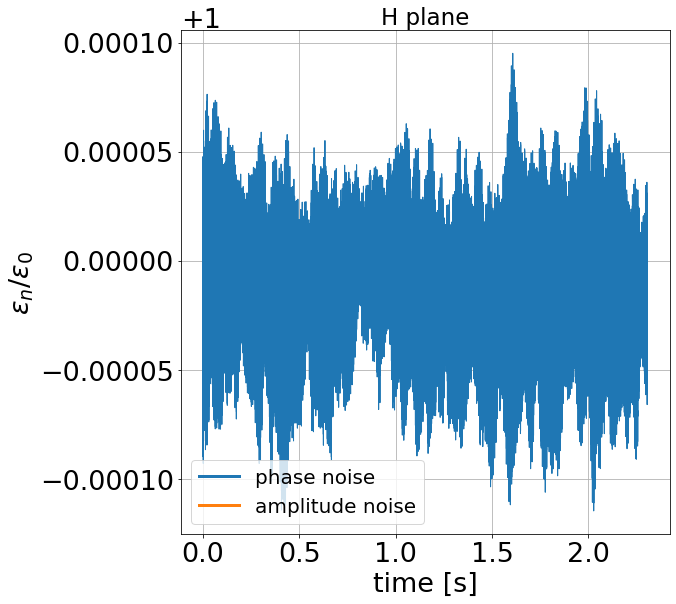

In [22]:
tune_spread = tune_spreads[0]
plt.plot(time, ex_mean['DQ{}'.format(tune_spread)]/ex_mean['DQ{}'.format(tune_spread)][0], c='C0')
plt.plot(1,1,c='C0',  label = 'phase noise', linewidth = 3)    
plt.plot(1,1,c='C1',  label = 'amplitude noise', linewidth = 3)    
plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_n / \epsilon_0$')
plt.title('H plane')
plt.legend(loc=3)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('H_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_mean10runs.png')

#### 5) Plot evolution of the V (vertical emittance) emittance, for an example case

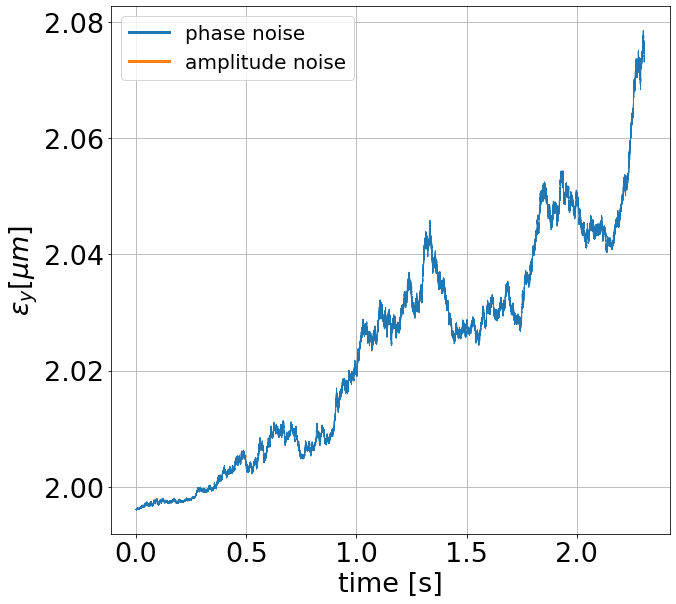

In [23]:
tune_spread = tune_spreads[0]
plt.plot(time, np.array(ey_mean['DQ{}'.format(tune_spread)])*1e6, c='C0')    
plt.plot(2,2,c='C0',  label = 'phase noise', linewidth = 3)    
plt.plot(2,2,c='C1',  label = 'amplitude noise', linewidth = 3)    
plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emittance_growth_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_mean10runs.png')

#### 6) Plot evolution of the standard deviation $\sigma$ of the emittance values (in the vertical plane), for an example case

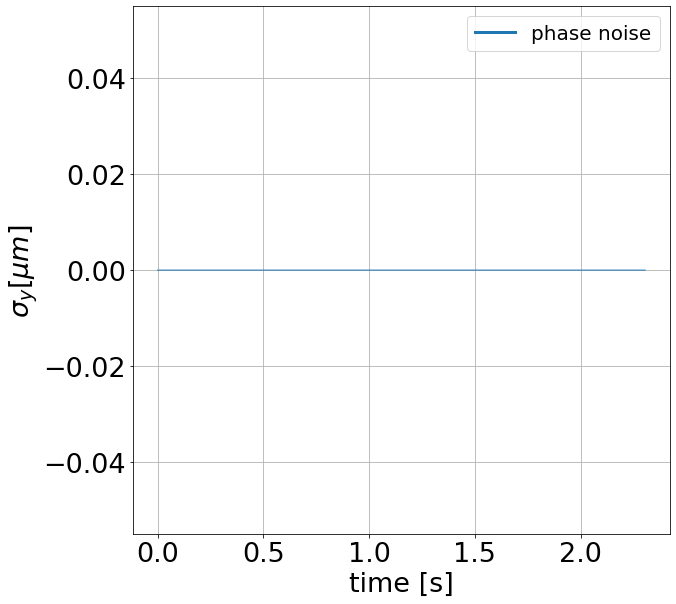

In [24]:
tune_spread = tune_spreads[0]
plt.plot(time, np.array(ey_std['DQ{}'.format(tune_spread)])*1e6, c='C0')   
plt.plot(0,0,c='C0',  label = 'phase noise', linewidth = 3)   
plt.xlabel('time [s]')
plt.ylabel(r'$\sigma_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_std_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_mean10runs.png')

#### 7) Compute the emittance growth rate via a linear fit
- Polynomial fit. The degree of the fitting polynomial is 1. 
- V plane only

In [25]:
m_list = []
b_list = []
err_list = []
for tune_spread in tune_spreads:
    # linear fit
    [m_temp, b_temp], cov_temp = np.polyfit(time, ey_mean['DQ{}'.format(tune_spread)], 1, cov=True)
    m_list.append(m_temp)
    b_list.append(b_temp)
    # compute the error of the gradient of the fit slope
    err_list.append(np.sqrt(np.diag(cov_temp)))

#### Plot the fit for an example case of tune spread

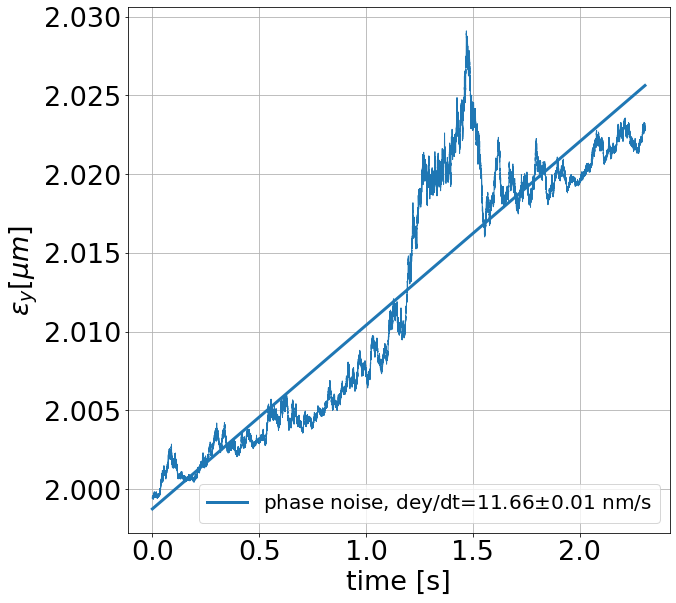

In [26]:
index = 3
tune_spread = tune_spreads[index]
plt.plot(time, np.array(ey_mean['DQ{}'.format(tune_spread)])*1e6, c='C0')
plt.plot(time, (m_list[index]*time+b_list[index])*1e6, c = 'C0', label='phase noise, dey/dt={0:.2f}'.format(m_list[index]*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_list[index][0]*1e9), linewidth = 3)

plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emittance_growth_rate_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_mean{}runs.png'.format(type_of_noise, n_runs))

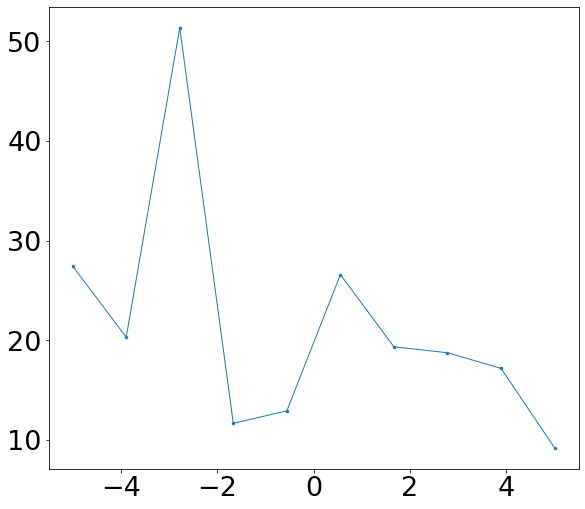

In [27]:
plt.plot(tune_spreads, np.array(m_list)*1e9, '.-')